In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
(train['Total Volume Donated (c.c.)'] / train['Number of Donations']).unique()

array([ 250.])

In [4]:
def clean_data(data):
    data = data.rename(columns={
            'Unnamed: 0': 'id',
            'Number of Donations': 'N',
            'Months since First Donation': 'since_first',
            'Months since Last Donation': 'since_last',
            'Made Donation in March 2007': 'y'
        })
    data['rate'] = data['N'] / (data['since_first'] - data['since_last'] + 1)
    data = data.drop('Total Volume Donated (c.c.)', axis=1)
    return data

In [5]:
train = clean_data(train)
test = clean_data(test)
feature_names = ['N', 'since_first', 'since_last', 'rate']
X_train, X_test, y_train, y_test = train_test_split(train[feature_names],
                                                    train['y'],
                                                    test_size=0.3,
                                                    random_state=42)

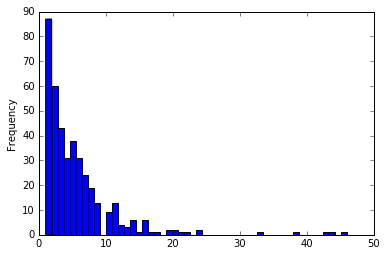

In [6]:
X_train['N'].plot.hist(bins=50)

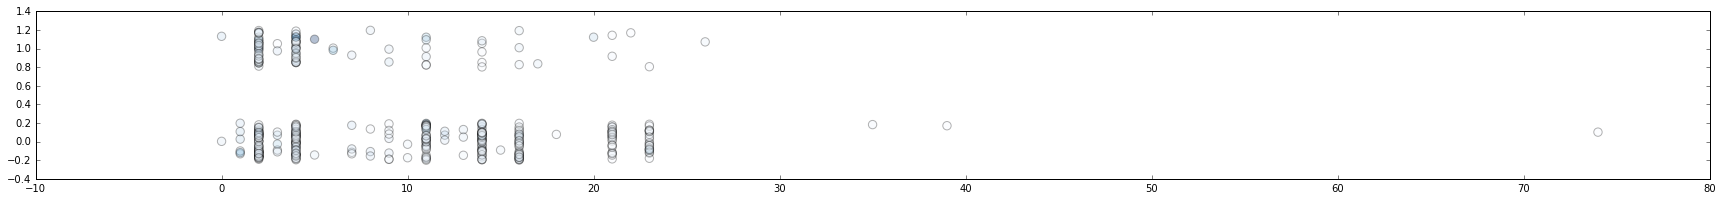

In [7]:
plt.figure(figsize=(30,3))
plt.scatter(x=X_train['since_last'],
            y=y_train + np.random.uniform(-0.2, 0.2, size=len(y_train)),
            c=X_train['N'],
            s=70,
            cmap='Blues',
            alpha=0.3)

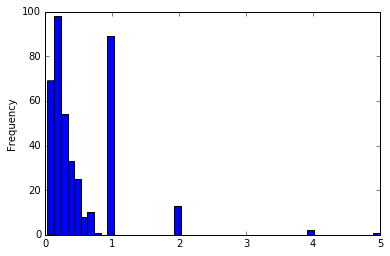

In [8]:
X_train['rate'].plot.hist(bins=50)

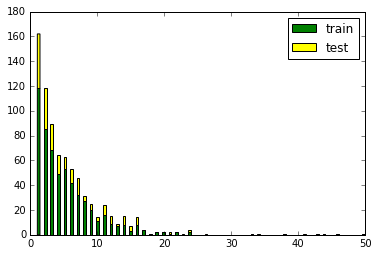

In [9]:
plt.hist([train['N'], test['N']], bins=100, stacked=True, color=['green', 'yellow'], label=['train', 'test'])
plt.legend()

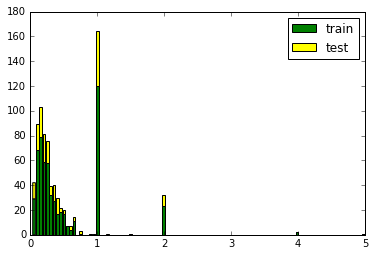

In [10]:
plt.hist([train['rate'], test['rate']], bins=100, stacked=True, color=['green', 'yellow'], label=['train', 'test'])
plt.legend()

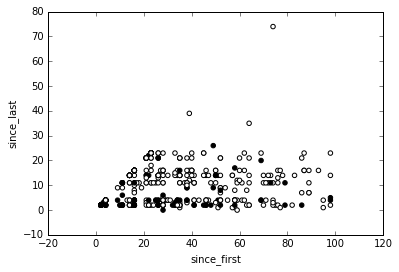

In [12]:
X_train.plot.scatter(x='since_first', y='since_last', color=y_train)

In [13]:
# %matplotlib qt

# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_train['N'], X_train['since_first'], X_train['since_last'], c=y_train, s=70, alpha=0.3)
# plt.show()

In [14]:
%matplotlib inline

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

In [16]:
feature_names.append('intercept')
train['intercept'] = 1
test['intercept'] = 1
X_train['intercept'] = 1
X_test['intercept'] = 1

In [17]:
model = LogisticRegression()

In [18]:
-cross_val_score(model, train[feature_names], train['y'], cv=10, scoring='log_loss').mean()

0.53023245854962231

In [19]:
model = LogisticRegression()
model.fit(pd.concat([X_train, X_test], axis=0), pd.concat([y_train, y_test], axis=0))
log_loss(y_test, model.predict_proba(X_test))

0.49848767886239082

In [20]:
model.predict(X_test).sum(), y_test.sum()

(7, 49L)

In [21]:
pd.DataFrame(model.coef_, columns=feature_names)

,N,since_first,since_last,rate,intercept
0,0.135547,-0.023234,-0.086146,-0.278225,-0.187993


In [22]:
submission = pd.DataFrame({
        '': test['id'],
        'Made Donation in March 2007': [predict[1] for predict in model.predict_proba(test[feature_names])]
        })

In [23]:
submission.to_csv('submission.csv', index=False)

This submission got a score of 0.4405, which got me (at the time of writing) to rank 86